In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

In [6]:
uci_data = pd.read_csv('heart_disease_uci.csv')

In [7]:
uci_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
uci_data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [9]:
uci_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [10]:
uci_data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [11]:
uci_data_new = uci_data.drop(['id','dataset'], axis=1)

<Axes: ylabel='Count'>

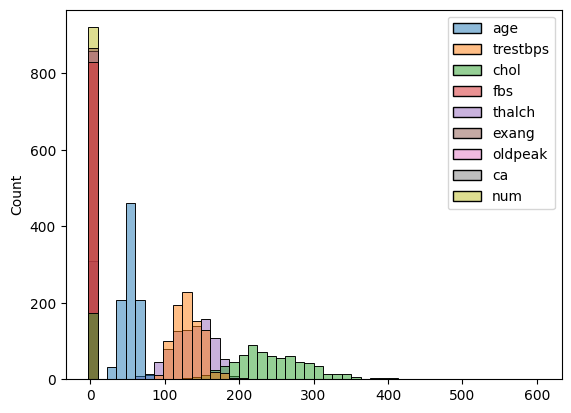

In [12]:
sns.histplot(uci_data_new)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>],
       [<Axes: title={'center': 'thalch'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'num'}>, <Axes: >, <Axes: >]],
      dtype=object)

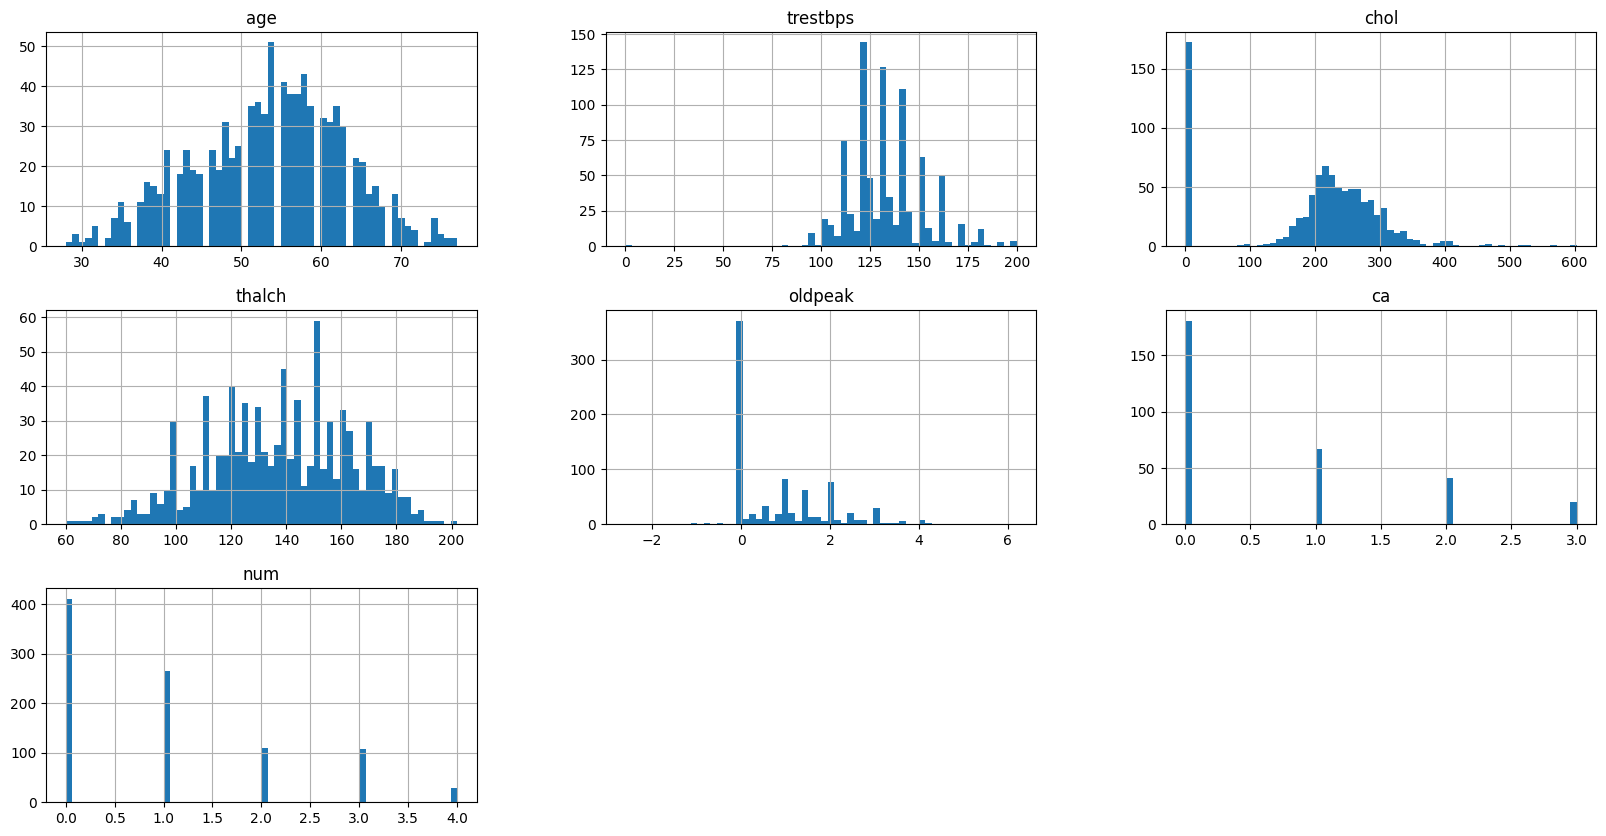

In [122]:
uci_data_new.hist(bins=60, figsize=(20, 10))

<Axes: >

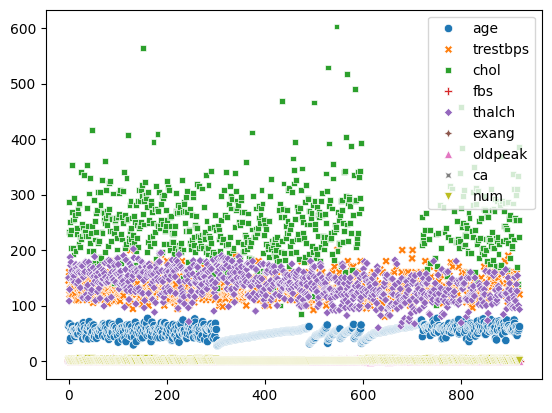

In [84]:
sns.scatterplot(uci_data_new)

<Axes: xlabel='oldpeak', ylabel='id'>

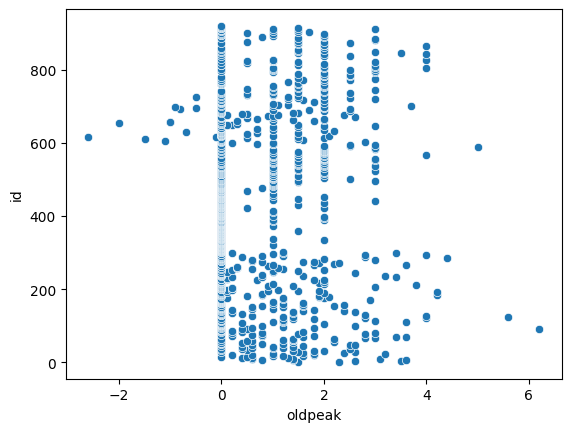

In [87]:
sns.scatterplot(x=uci_data_new['oldpeak'], y=uci_data['id'])

<Axes: xlabel='chol', ylabel='id'>

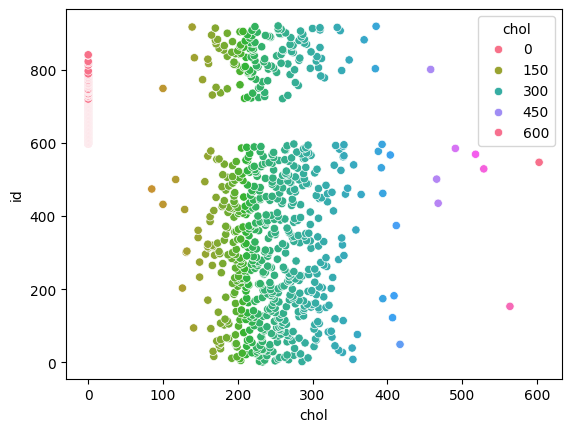

In [88]:
sns.scatterplot(x=uci_data_new['chol'], y=uci_data['id'], hue=uci_data_new['chol'], palette='husl')

In [123]:
corr_matrix = uci_data_new.corr(numeric_only=True)

<Axes: >

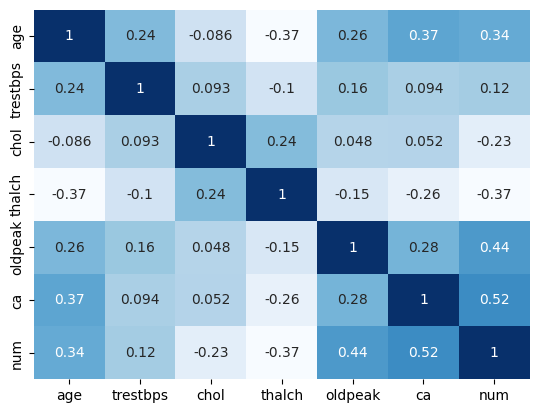

In [90]:
sns.heatmap(corr_matrix, cbar=False, annot=True, cmap='Blues')

In [164]:
uci_data_new.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       0
thalch       55
exang        55
oldpeak      62
slope         0
ca          611
thal          0
num           0
dtype: int64

In [92]:
corr_matrix

,age,trestbps,chol,thalch,oldpeak,ca,num
age,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.370416,0.339596
trestbps,0.244253,1.000000,0.092853,-0.104899,0.161908,0.093705,0.122291
chol,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.231547
thalch,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.264094,-0.366265
oldpeak,0.258243,0.161908,0.047734,-0.151174,1.000000,0.281817,0.443084
ca,0.370416,0.093705,0.051606,-0.264094,0.281817,1.000000,0.516216
num,0.339596,0.122291,-0.231547,-0.366265,0.443084,0.516216,1.000000


#trestbps and chol have lesser correlation to num

In [93]:
uci_data_new[uci_data_new['trestbps'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
393,48,Female,atypical angina,NaN,308.0,False,st-t abnormality,NaN,NaN,2.0,upsloping,NaN,NaN,0
599,35,Male,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
714,69,Male,asymptomatic,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,reversable defect,3
733,63,Male,non-anginal,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1
743,74,Male,non-anginal,NaN,0.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,0
746,51,Male,asymptomatic,NaN,0.0,True,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,2
749,55,Male,non-anginal,NaN,228.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
750,54,Male,asymptomatic,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
756,60,Male,asymptomatic,NaN,281.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,2
758,58,Male,asymptomatic,NaN,203.0,True,normal,NaN,NaN,NaN,NaN,NaN,NaN,1


In [124]:
print(uci_data_new['sex'].value_counts())
print('CP: ',uci_data_new['cp'].value_counts())
print('FBS: ',uci_data_new['fbs'].value_counts())
print('resecg: ',uci_data_new['restecg'].value_counts())
print('exang: ',uci_data_new['exang'].value_counts())
print('slope: ',uci_data_new['slope'].value_counts())
print('thal: ',uci_data_new['thal'].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64
CP:  cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
FBS:  fbs
False    692
True     138
Name: count, dtype: int64
resecg:  restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
exang:  exang
False    528
True     337
Name: count, dtype: int64
slope:  slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64
thal:  thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


<Axes: xlabel='chol', ylabel='age'>

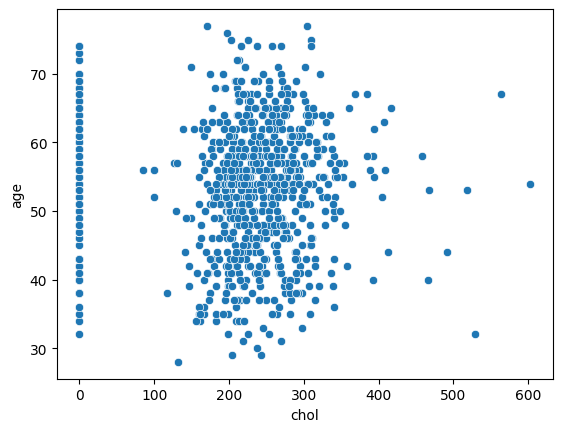

In [95]:
sns.scatterplot(x=uci_data_new['chol'], y=uci_data_new['age'])

In [96]:
uci_data_new[uci_data_new['chol']>=550]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
152,67,Female,non-anginal,115.0,564.0,False,lv hypertrophy,160.0,False,1.6,flat,0.0,reversable defect,0
546,54,Male,asymptomatic,130.0,603.0,True,normal,125.0,True,1.0,flat,NaN,NaN,1


<Axes: xlabel='sex'>

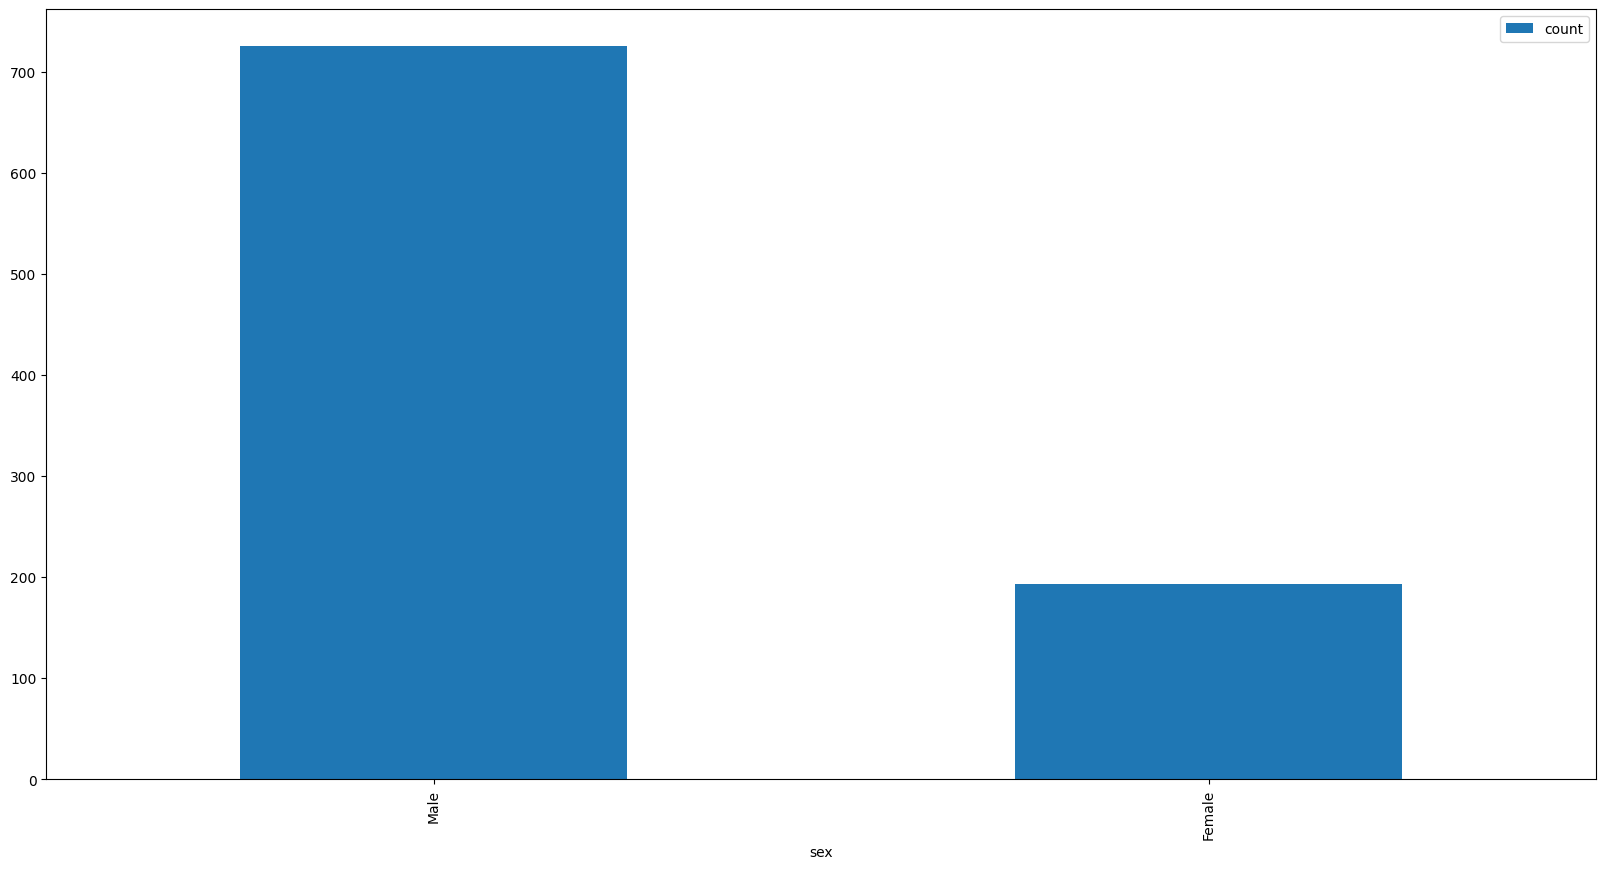

In [13]:
pd.DataFrame(uci_data_new['sex'].value_counts()).plot(kind='bar', figsize=(20, 10))

In [80]:
uci_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 107.9+ KB


In [125]:
class_distribution = uci_data_new['num'].value_counts()
class_distribution

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

(-1.0999940893552502,
 1.0999995668111757,
 -1.0999994956237598,
 1.0999999759820838)

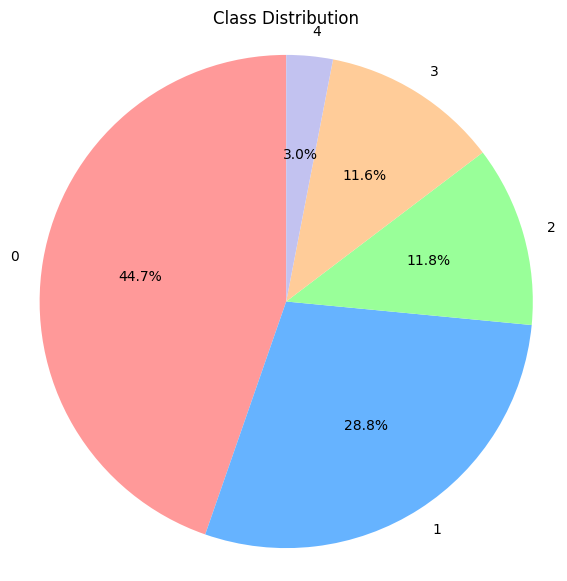

In [101]:
plt.figure(figsize=(7,7))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Class Distribution')
plt.axis('equal')

Text(0, 0.5, 'Count')

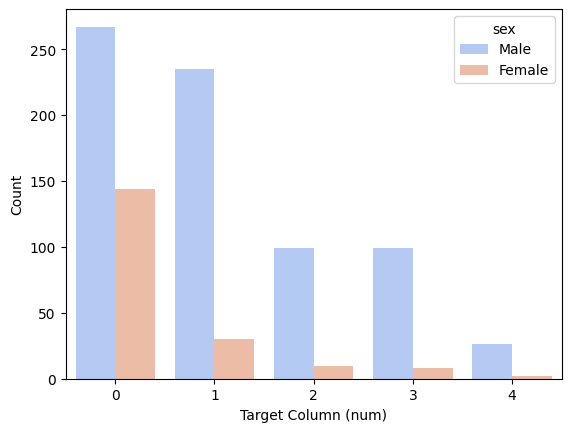

In [102]:
sns.countplot(x='num', hue='sex', data=uci_data_new, palette='coolwarm')
plt.xlabel('Target Column (num)')
plt.ylabel('Count')

In [204]:
numeric_cols = uci_data_new.select_dtypes(include=['number']).columns
numeric_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

In [205]:
uci_data_new.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [206]:
for col in numeric_cols:
    uci_data_new[col].fillna(uci_data_new[col].mean(), inplace=True)

In [207]:
uci_data_new.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

In [208]:
categorical_columns = ['sex', 'cp', 'thal', 'restecg', 'slope', 'fbs', 'exang']
for col in categorical_columns:
    uci_data_new[col].fillna(uci_data_new[col].mode()[0], inplace=True)

In [209]:
uci_data_new.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [210]:
categorical_columns = categorical_columns = ['cp', 'thal', 'sex', 'restecg', 'slope', 'fbs', 'exang']
for col in categorical_columns:
    if uci_data_new[col].nunique() == 2:
        uci_data_new[col] = LabelEncoder().fit_transform(uci_data_new[col])
    else:
        onehot_encoded = pd.get_dummies(uci_data_new[col], prefix=col)
        uci_data_new = pd.concat([uci_data_new, onehot_encoded], axis=1)
        uci_data_new.drop(columns=[col], inplace=True)

X = uci_data_new.drop(columns=['num'])
y = uci_data_new['num']

In [223]:
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=150),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Naive Bayes': GaussianNB(),
    "MLP Neural Network": MLPClassifier()
}

In [235]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [236]:
performance = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    performance[name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    }

performance_df = pd.DataFrame(performance).T

/Users/harika/miniconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/harika/miniconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/harika/miniconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [220]:
performance_df #before SMOTE

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.559783,0.495746,0.559783,0.495246
K-Nearest Neighbors,0.445652,0.392722,0.445652,0.387856
Random Forest,0.570652,0.531242,0.570652,0.537835
Support Vector Classifier,0.445652,0.277095,0.445652,0.324042
Naive Bayes,0.451087,0.479113,0.451087,0.454995


In [226]:
performance_df #after SMOTE

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.486618,0.471583,0.486618,0.475953
K-Nearest Neighbors,0.637470,0.639545,0.637470,0.632345
Random Forest,0.812652,0.811751,0.812652,0.809670
Support Vector Classifier,0.413625,0.450005,0.413625,0.390203
Naive Bayes,0.435523,0.408863,0.435523,0.375742


In [230]:
performance_df #SMOTE + scaled

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.518248,0.500018,0.518248,0.507080
K-Nearest Neighbors,0.693431,0.694247,0.693431,0.688112
Random Forest,0.810219,0.809870,0.810219,0.805793
Support Vector Classifier,0.693431,0.692777,0.693431,0.691130
Naive Bayes,0.357664,0.242258,0.357664,0.250509


In [237]:
performance_df #SMOTE + scaled + MLP

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.518248,0.500018,0.518248,0.507080
K-Nearest Neighbors,0.693431,0.694247,0.693431,0.688112
Random Forest,0.815085,0.813283,0.815085,0.811918
Support Vector Classifier,0.693431,0.692777,0.693431,0.691130
Naive Bayes,0.357664,0.242258,0.357664,0.250509
MLP Neural Network,0.717762,0.711882,0.717762,0.713158


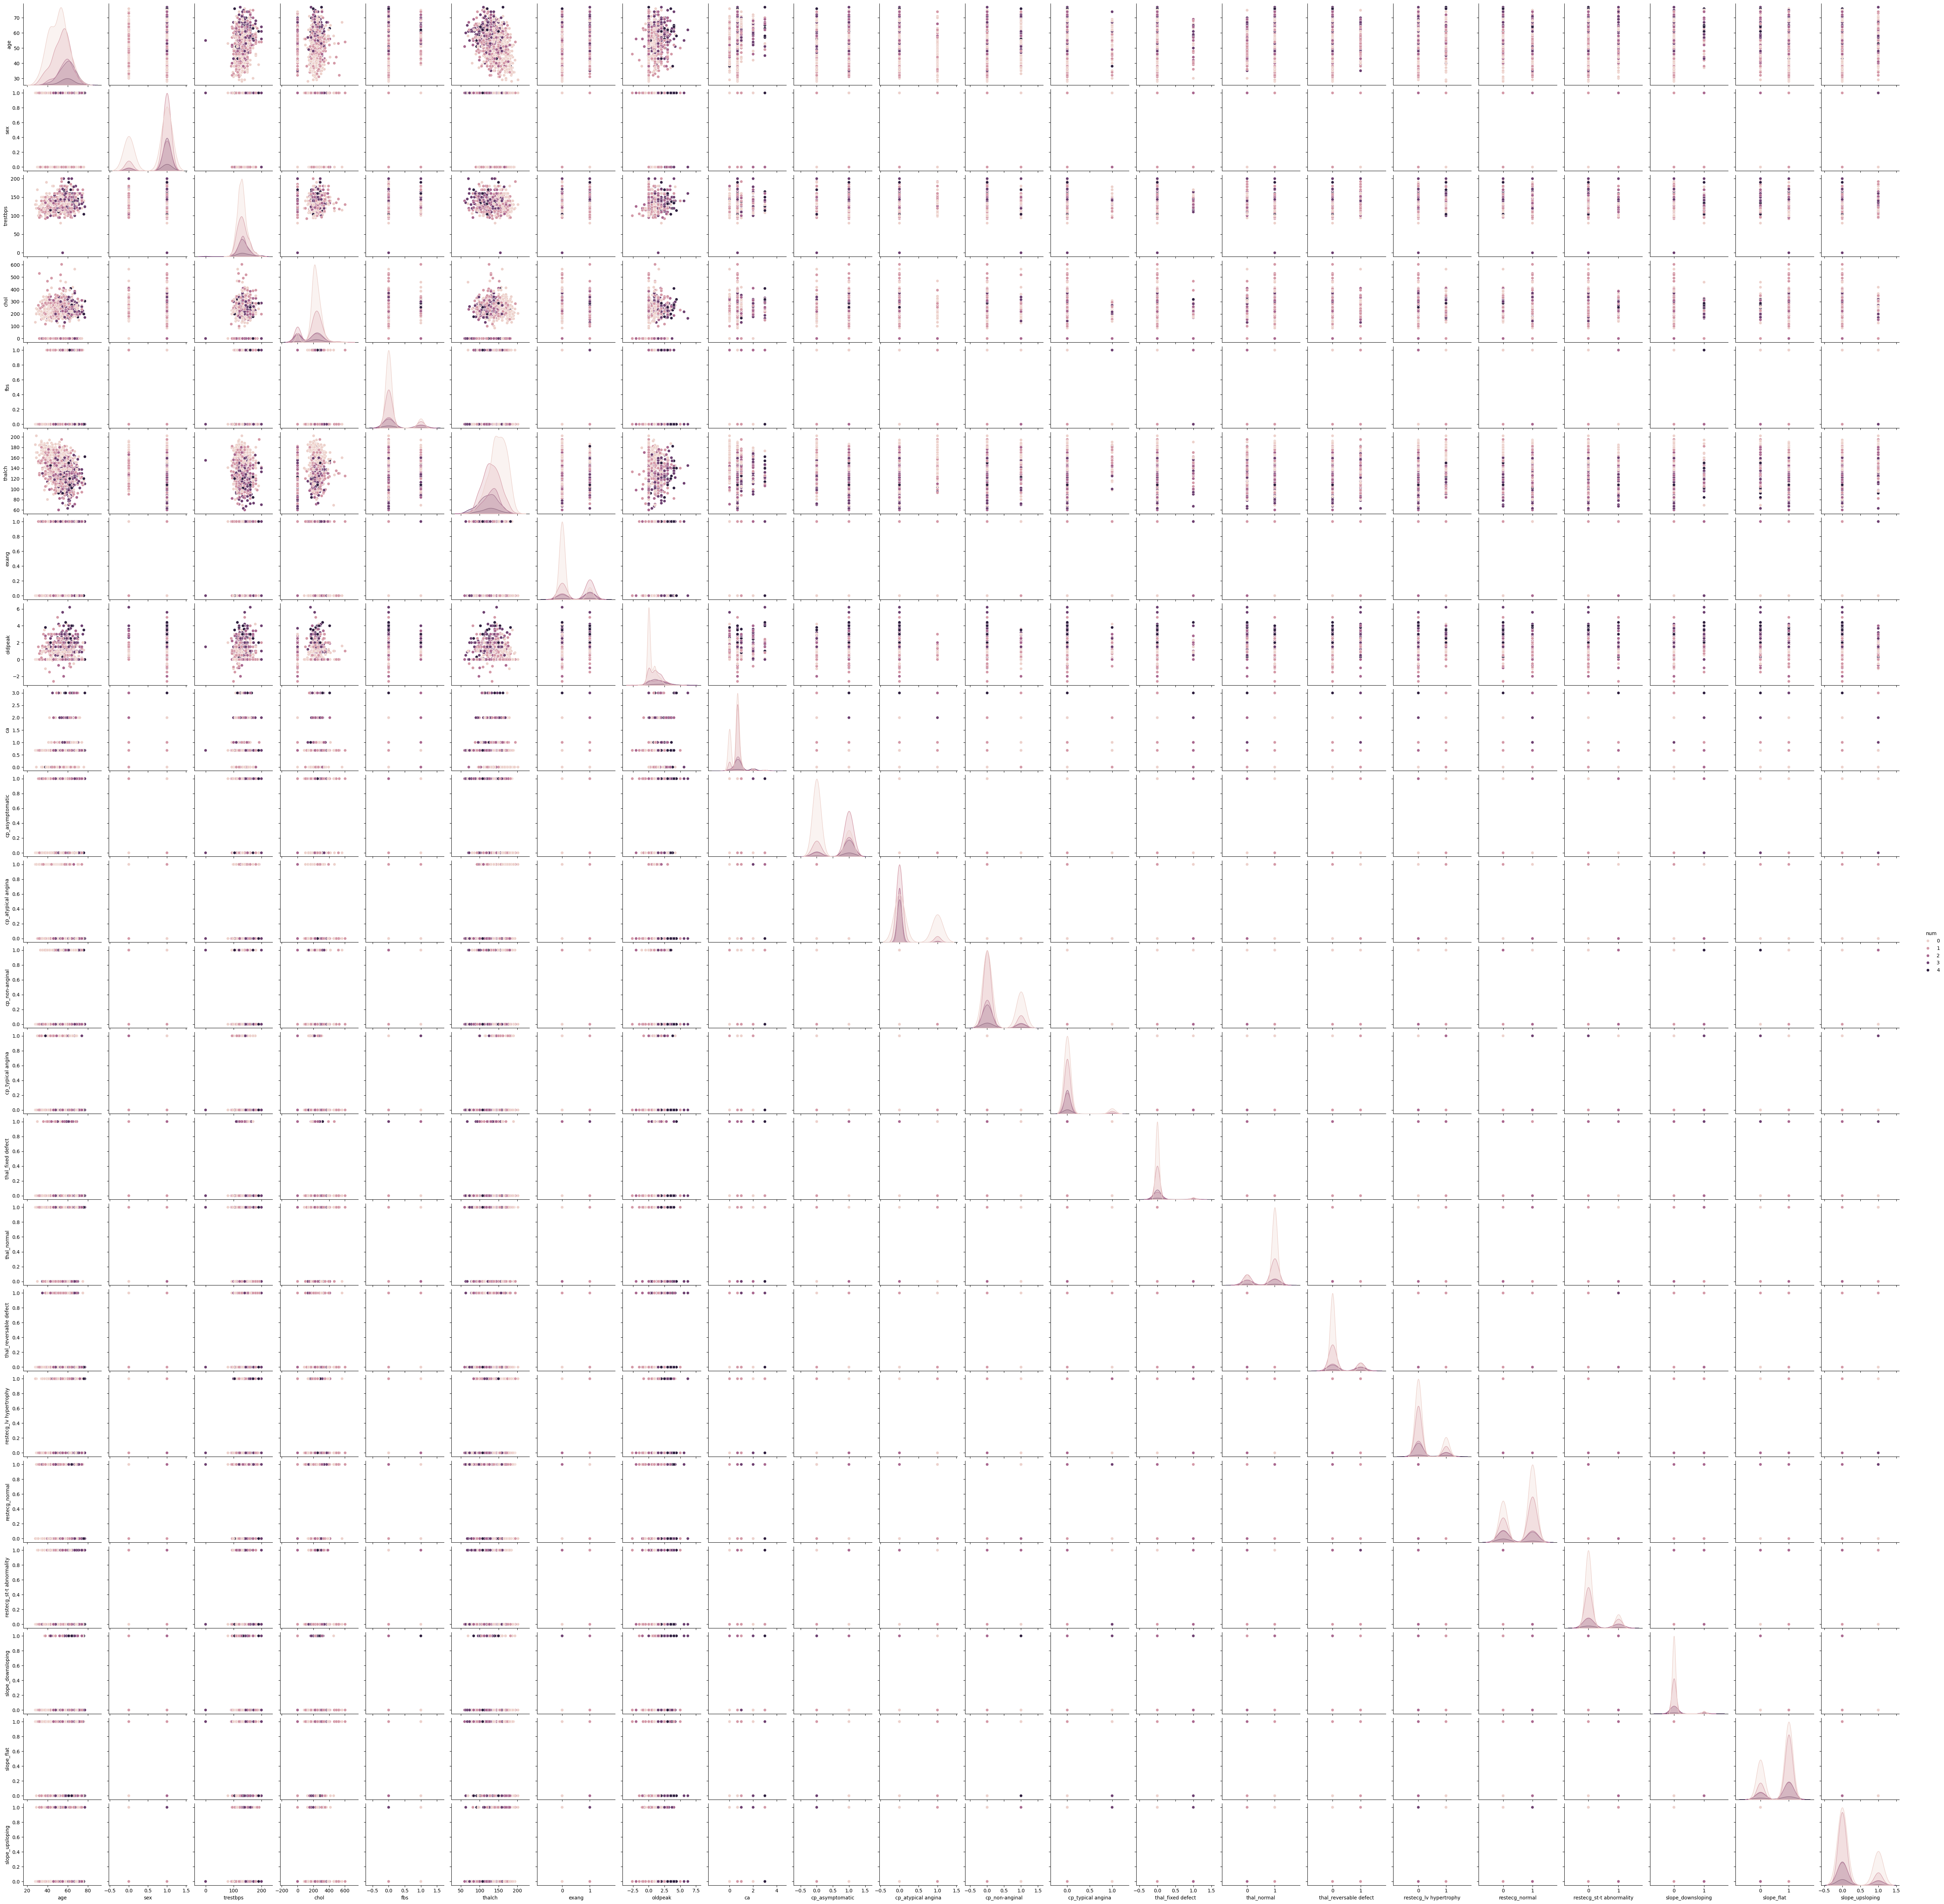

In [241]:
sns.pairplot(uci_data_new, hue='num')